# Capstone_Code

In [3]:
import pandas as pd 
import numpy as np

In [4]:
web_url=pd.read_html('https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Beijing')

In [5]:
borough=pd.DataFrame(web_url[4])
borough

,Unnamed: 0,Name,Chinese,Hanyu Pinyin,Division code[1],Division code[1].1,Area (km²),Population (2010 census)[2],Density (/km²)
0,NaN,Dongcheng District(City seat),东城区,Dōngchéng Qū,110101,DCQ,40.6,919000,22635
1,NaN,Xicheng District,西城区,Xīchéng Qū,110102,XCQ,46.5,1243000,26731
2,NaN,Chaoyang District,朝阳区,Cháoyáng Qū,110105,CYQ,470.8,3545000,7530
3,NaN,Fengtai District,丰台区,Fēngtái Qū,110106,FTQ,304.2,2112000,6943
4,NaN,Shijingshan District,石景山区,Shíjǐngshān Qū,110107,SJS,89.8,616000,6860
5,NaN,Haidian District,海淀区,Hǎidiàn Qū,110108,HDN,426.0,3281000,7702
6,NaN,Mentougou District,门头沟区,Méntóugōu Qū,110109,MTG,1331.3,290000,218
7,NaN,Fangshan District,房山区,Fángshān Qū,110111,FSQ,1866.7,945000,506
8,NaN,Tongzhou District(City seat),通州区,Tōngzhōu Qū,110112,TZQ,870.0,1184000,1361
9,NaN,Shunyi District,顺义区,Shùnyì Qū,110113,SYI,980.0,877000,895


In [6]:
borough_drop=borough.drop(columns=['Unnamed: 0','Hanyu Pinyin','Division code[1]','Division code[1].1','Area (km²)','Population (2010 census)[2]'])
borough_drop.head()

,Name,Chinese,Density (/km²)
0,Dongcheng District(City seat),东城区,22635
1,Xicheng District,西城区,26731
2,Chaoyang District,朝阳区,7530
3,Fengtai District,丰台区,6943
4,Shijingshan District,石景山区,6860


In [7]:
borough_drop1=borough_drop.replace('Dongcheng District(City seat)','Dongcheng District')
borough_drop2=borough_drop1.replace('Tongzhou District(City seat)','Tongzhou District')

In [8]:
borough_df=borough_drop2.rename(columns={'Name':'District'})
borough_df['Consumption Level/Person(WYuan)']=[1153/40.6,1043/40.5,2798/470.8,1171/304.2,312/89.8,2340/426,69/1331.3,253/1866.7,440/870,479/980,466/1430,439/1012,126/2557.3,114/1075,148/2335.6,98/1980]/borough_df['Density (/km²)']*100000
borough_df['Consumption Level/Person(WYuan)']=borough_df['Consumption Level/Person(WYuan)'].apply(int)
borough_df

,District,Chinese,Density (/km²),Consumption Level/Person(WYuan)
0,Dongcheng District,东城区,22635,125
1,Xicheng District,西城区,26731,96
2,Chaoyang District,朝阳区,7530,78
3,Fengtai District,丰台区,6943,55
4,Shijingshan District,石景山区,6860,50
5,Haidian District,海淀区,7702,71
6,Mentougou District,门头沟区,218,23
7,Fangshan District,房山区,506,26
8,Tongzhou District,通州区,1361,37
9,Shunyi District,顺义区,895,54


In [9]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Consumption Level per Person of the Districts in Beijing')

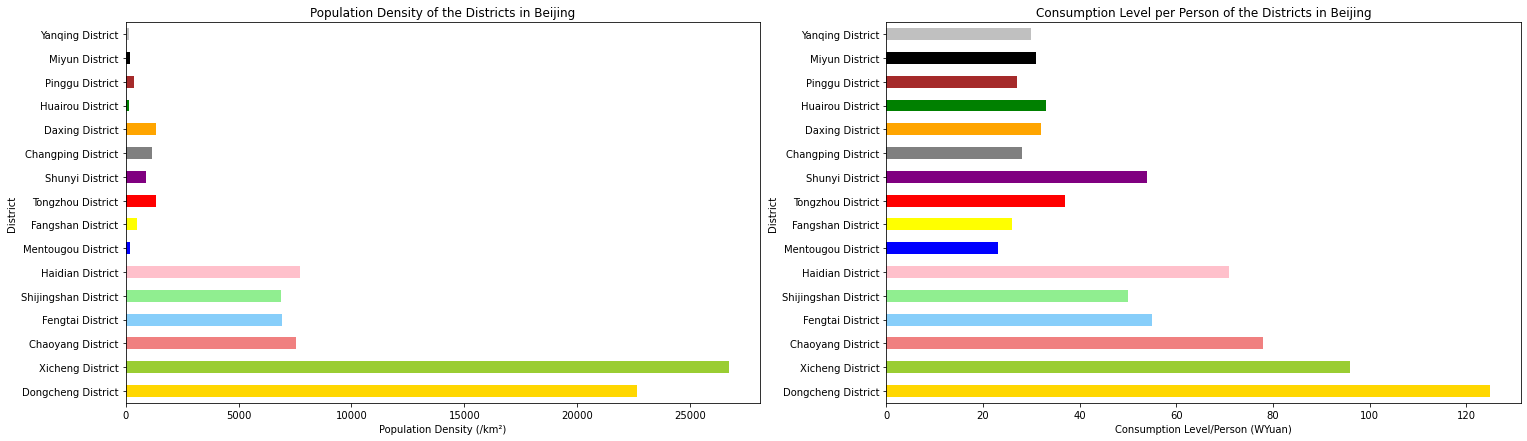

In [10]:
fig = plt.figure() 

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','blue','yellow','red','purple','grey','orange','green','brown','black','silver']

density= fig.add_subplot(1, 2, 1) 
borough_df_den=pd.DataFrame({'District':borough_df['District'],'Density (/km²)':borough_df['Density (/km²)']})
borough_df_dens=borough_df_den.set_index('District')
borough_df_dens['Density (/km²)'].plot(kind='barh', figsize=(25, 7), color=colors_list)
plt.xlabel('Population Density (/km²)')
plt.ylabel('District')
plt.title('Population Density of the Districts in Beijing')

density= fig.add_subplot(1, 2, 2) 
borough_df_csp=pd.DataFrame({'District':borough_df['District'],'Consumption Level/Person(WYuan)':borough_df['Consumption Level/Person(WYuan)']})
borough_df_cspt=borough_df_csp.set_index('District')
borough_df_cspt['Consumption Level/Person(WYuan)'].plot(kind='barh', figsize=(25, 7), color=colors_list)
plt.xlabel('Consumption Level/Person (WYuan)')
plt.ylabel('District')
plt.title('Consumption Level per Person of the Districts in Beijing')





In [11]:
from geopy.geocoders import Nominatim 

In [12]:
geolocator0 = Nominatim(user_agent="My_App")
location0 = geolocator0.geocode('Beijing')
latitude0 = location0.latitude
longitude0 = location0.longitude
print('The geograpical coordinate of Beijing are {}, {}.'.format(latitude0, longitude0))

The geograpical coordinate of Beijing are 39.9020803, 116.7185213.


In [13]:
!conda install -c conda-forge folium=0.10.0 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                             \      failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.9|3.6.9|3.6.9|3.6.9|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|3.4.*',build='3_73_pypy|2_73_pypy|1_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that

In [14]:
!pip install folium

     |████████████████████████████████| 93 kB 3.2 MB/s  eta 0:00:01


In [15]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from pandas.io.json import json_normalize
import requests

In [16]:
geocontent = requests.get("https://geo.datav.aliyun.com/areas_v2/bound/110000_full.json")
beijing_geo = json.loads(geocontent.content)

In [17]:
beijing_map_density= folium.Map(location0=[latitude0, longitude0], zoom_start=5)

In [18]:
threshold_scale_density = np.linspace(borough_df['Density (/km²)'].min(),
                              borough_df['Density (/km²)'].max(),
                              5, dtype=int)
threshold_scale_density = threshold_scale_density.tolist()
threshold_scale_density[-1] = threshold_scale_density[-1] + 1

In [19]:
beijing_map_density.choropleth(
    geo_data=beijing_geo,
    data=borough_df,
    columns=['Chinese', 'Density (/km²)'],
    key_on='feature.properties.name',
    threshold_scale_density=threshold_scale_density,
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Population Density in Beijing',
    reset=True
)
beijing_map_density

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [20]:
beijing_map_consumption= folium.Map(location0=[latitude0, longitude0], zoom_start=5)

In [21]:
threshold_scale_con = np.linspace(borough_df['Consumption Level/Person(WYuan)'].min(),
                              borough_df['Consumption Level/Person(WYuan)'].max(),
                              5, dtype=int)
threshold_scale_con = threshold_scale_con.tolist()
threshold_scale_con[-1] = threshold_scale_con[-1] + 1

In [22]:
beijing_map_consumption.choropleth(
    geo_data=beijing_geo,
    data=borough_df,
    columns=['Chinese','Consumption Level/Person(WYuan)'],
    key_on='feature.properties.name',
    threshold_scale_con=threshold_scale_con,
    fill_color='BuPu', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Consumption level in Beijing',
    reset=True
)
beijing_map_consumption

In [23]:
beijing_map_cd= folium.Map(location0=[latitude0, longitude0], zoom_start=5)

In [25]:
borough_df['Consumption Level/Density']=borough_df['Consumption Level/Person(WYuan)']/borough_df['Density (/km²)']

In [26]:
threshold_scale_cd = np.linspace(borough_df['Consumption Level/Density'].min(),
                             borough_df['Consumption Level/Density'].max(),
                              5, dtype=int)
threshold_scale_cd = threshold_scale_cd.tolist()
threshold_scale_cd[-1] = threshold_scale_cd[-1] + 1

In [28]:
beijing_map_cd.choropleth(
    geo_data=beijing_geo,
    data=borough_df,
    columns=['Chinese','Consumption Level/Density'],
    key_on='feature.properties.name',
    threshold_scale_cd=threshold_scale_cd,
    fill_color='YlGn', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Consumption level/population density in Beijing',
    reset=True
)
beijing_map_cd

In [29]:
!pip install geocoder

     |████████████████████████████████| 98 kB 8.8 MB/s  eta 0:00:01


In [30]:
import geocoder

In [31]:
lat=[]
lng=[]
geo=borough_df['District']

In [32]:
for i in geo:
    lat_lng=None
    while (lat_lng is None):
        g=geocoder.arcgis('{}'.format(str(i)+',Beijing,'+'China'))
        lat_lng=g.latlng
        latitude=lat_lng[0]
        longitude=lat_lng[1]
        lat.append(latitude)
        lng.append(longitude)

In [33]:
borough_beijing=pd.DataFrame({'District':borough_df['District'],'Latitude':lat,'Longitude':lng,'Density (/km²)':borough_df['Density (/km²)'],'Consumption Level/Person(WYuan)':borough_df['Consumption Level/Person(WYuan)']})
borough_beijing

,District,Latitude,Longitude,Density (/km²),Consumption Level/Person(WYuan)
0,Dongcheng District,39.93264,116.41834,22635,125
1,Xicheng District,39.93317,116.37337,26731,96
2,Chaoyang District,39.95462,116.50290,7530,78
3,Fengtai District,39.84757,116.27227,6943,55
4,Shijingshan District,39.91124,116.18766,6860,50
5,Haidian District,39.99064,116.28868,7702,71
6,Mentougou District,39.93819,116.09307,218,23
7,Fangshan District,39.69833,115.99250,506,26
8,Tongzhou District,39.90395,116.66183,1361,37
9,Shunyi District,40.12175,116.64783,895,54


In [34]:
beijing_map= folium.Map(location0=[latitude0, longitude0], zoom_start=5)

In [35]:
for lat, lng, label in zip(borough_beijing['Latitude'], borough_beijing['Longitude'], borough_beijing['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(beijing_map)  
    
beijing_map

In [36]:
CLIENT_ID = 'QT11OGLXEVLSKHARDD02AJBZ0N4PR5UBZDY45R0ZRFNYNJIN' 
CLIENT_SECRET = 'ODMDB4LBQKGLUCEDI1BG043R1Q1RAHNV5RV1GIJ3TNG53QQK' 
VERSION = '20180605'
LIMIT = 100

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)     
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
beijing_venues = getNearbyVenues(names=borough_beijing['District'],
                                   latitudes=borough_beijing['Latitude'],
                                   longitudes=borough_beijing['Longitude']
                                  )
beijing_venues.head()

Dongcheng District
Xicheng District
Chaoyang District
Fengtai District
Shijingshan District
Haidian District
Mentougou District
Fangshan District
Tongzhou District
Shunyi District
Changping District
Daxing District
Huairou District
Pinggu District
Miyun District
Yanqing District


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dongcheng District,39.93264,116.41834,沪江香满楼,39.932272,116.420406,Chinese Restaurant
1,Dongcheng District,39.93264,116.41834,Double Happiness Courtyard Hotel Beijing,39.926272,116.415990,Motel
2,Dongcheng District,39.93264,116.41834,Sijiminfu Roast Duck Restaurant (四季民福烤鸭店),39.932309,116.423951,Chinese Restaurant
3,Dongcheng District,39.93264,116.41834,Dadong Roast Duck Restaurant (大董烤鸭店),39.931008,116.425677,Peking Duck Restaurant
4,Dongcheng District,39.93264,116.41834,Ascott Raffles City 雅诗阁,39.938405,116.426129,Hotel


In [39]:
beijing_venues_count=beijing_venues.groupby('District').count()
beijing_venues_count.head()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Changping District,7,7,7,7,7,7
Chaoyang District,20,20,20,20,20,20
Daxing District,9,9,9,9,9,9
Dongcheng District,100,100,100,100,100,100
Fangshan District,2,2,2,2,2,2


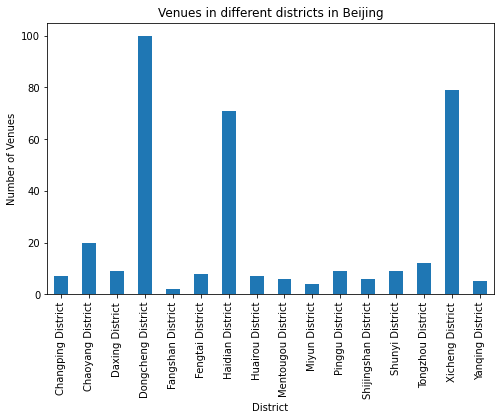

In [40]:
beijing_venues_count['Venue'].plot(kind='bar', figsize=(8, 5))

plt.title('Venues in different districts in Beijing') 
plt.ylabel('Number of Venues')
plt.xlabel('District') 

plt.show()

In [41]:
beijing_onehot = pd.get_dummies(beijing_venues[['Venue Category']], prefix="", prefix_sep="")
beijing_onehot['District'] = beijing_venues['District'] 
fixed_columns = [beijing_onehot.columns[-1]] + list(beijing_onehot.columns[:-1])
beijing_onehot = beijing_onehot[fixed_columns]

In [42]:
beijing_grouped = beijing_onehot.groupby('District').mean().reset_index()

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = beijing_grouped['District']

for ind in np.arange(beijing_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beijing_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Changping District,Chinese Restaurant,Train Station,Park,Shopping Mall,Clothing Store,Asian Restaurant,Hotpot Restaurant,Food & Drink Shop,Concert Hall,Convenience Store
1,Chaoyang District,Chinese Restaurant,Park,Café,Fast Food Restaurant,Flower Shop,Shopping Mall,Supermarket,Tennis Stadium,Shop & Service,Grocery Store
2,Daxing District,Metro Station,Chinese Restaurant,Convenience Store,Hotel,Pizza Place,Shop & Service,Shopping Mall,Fast Food Restaurant,Yunnan Restaurant,French Restaurant
3,Dongcheng District,Hotel,Chinese Restaurant,Coffee Shop,Café,Hostel,Bar,Szechuan Restaurant,Yunnan Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant
4,Fangshan District,Chinese Restaurant,Shipping Store,Yunnan Restaurant,Frozen Yogurt Shop,Concert Hall,Convenience Store,Coworking Space,Department Store,Dumpling Restaurant,Fast Food Restaurant


In [45]:
beijing_grouped_clustering = beijing_grouped.drop('District', 1)

In [46]:
featurelist=beijing_grouped_clustering.columns.values

In [47]:
from sklearn.cluster import KMeans

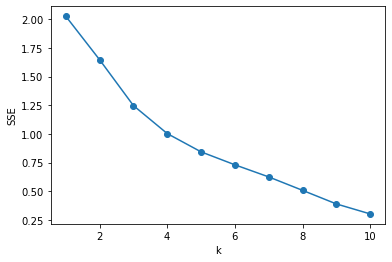

In [48]:
SSE = []
for k in range(1, 11):
    estimator = KMeans(n_clusters=k)
    estimator.fit(np.array(beijing_grouped_clustering[featurelist]))
    SSE.append(estimator.inertia_)
X = range(1, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [49]:
kclusters=3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(beijing_grouped_clustering)

In [50]:
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
beijing_merged = borough_beijing
beijing_merged = beijing_merged.join(district_venues_sorted.set_index('District'), on='District')
beijing_merged.head()

,District,Latitude,Longitude,Density (/km²),Consumption Level/Person(WYuan),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dongcheng District,39.93264,116.41834,22635,125,0,Hotel,Chinese Restaurant,Coffee Shop,Café,Hostel,Bar,Szechuan Restaurant,Yunnan Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant
1,Xicheng District,39.93317,116.37337,26731,96,0,Chinese Restaurant,Historic Site,Hotel,Bar,Café,Hostel,Pizza Place,Park,Coffee Shop,Fast Food Restaurant
2,Chaoyang District,39.95462,116.50290,7530,78,0,Chinese Restaurant,Park,Café,Fast Food Restaurant,Flower Shop,Shopping Mall,Supermarket,Tennis Stadium,Shop & Service,Grocery Store
3,Fengtai District,39.84757,116.27227,6943,55,0,Fast Food Restaurant,Chinese Restaurant,Train Station,Bus Station,Metro Station,Park,Grocery Store,Yunnan Restaurant,French Restaurant,Convenience Store
4,Shijingshan District,39.91124,116.18766,6860,50,0,Warehouse Store,Hotel,Bakery,Park,Metro Station,Gym / Fitness Center,Yunnan Restaurant,Frozen Yogurt Shop,Convenience Store,Coworking Space


In [51]:
beijing_merged['Cluster Labels'].isna().sum()

0

In [52]:
beijing=beijing_merged.dropna(subset=['Cluster Labels'])

In [53]:
beijing_cluster = pd.DataFrame({'Cluster Labels':beijing_merged['Cluster Labels'],'1st Most Common Venue':beijing_merged['1st Most Common Venue'],'Count':''})

In [54]:
beijing_cluster_df=pd.crosstab(beijing_cluster['Cluster Labels'],beijing_cluster['1st Most Common Venue'],beijing_cluster['Count'],aggfunc='count')
beijing_cluster_df.fillna(0)

1st Most Common Venue,Chinese Restaurant,Fast Food Restaurant,Historic Site,Hotel,Hotpot Restaurant,Lake,Metro Station,Resort,Warehouse Store
Cluster Labels,,,,,,,,,
0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


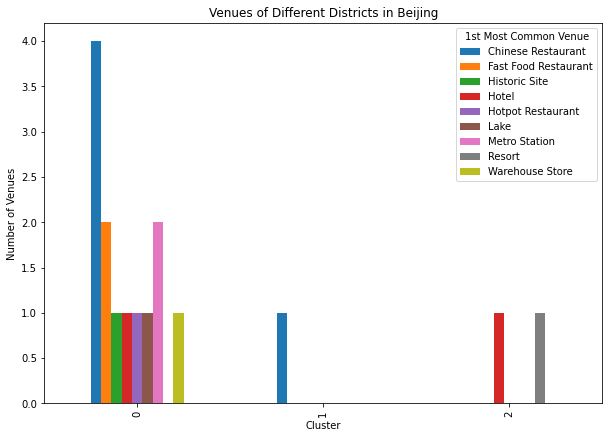

In [55]:
beijing_cluster_df.plot(kind='bar', figsize=(10, 7))

plt.title('Venues of Different Districts in Beijing') 
plt.ylabel('Number of Venues')
plt.xlabel('Cluster') 

plt.show()

In [56]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

beijing_clusters=beijing_map_cd

markers_colors = []
for lat, lon, poi, cluster in zip(beijing['Latitude'], beijing['Longitude'], beijing['District'], beijing['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(beijing_clusters)
       
beijing_clusters